### Maren Beckman
### Thinkful Final Exam
Model customer propensity to join loyalty program.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn import neighbors
from sklearn import ensemble

In [2]:
# load the data
raw = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')

In [3]:
raw.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [4]:
raw = raw.drop(columns='Unnamed: 0')
raw.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,19.58,male,no,31.0,35.0,False
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
4,22.32,female,yes,5.0,39.0,False


In [5]:
raw.dtypes

purch_amt                float64
gender                    object
card_on_file              object
age                      float64
days_since_last_purch    float64
loyalty                     bool
dtype: object

In [6]:
df_gender = pd.get_dummies(raw['gender'])
df_card = pd.get_dummies(raw['card_on_file'])
df = pd.concat([raw, df_gender, df_card], axis=1)
df.dtypes

purch_amt                float64
gender                    object
card_on_file              object
age                      float64
days_since_last_purch    float64
loyalty                     bool
female                     uint8
male                       uint8
no                         uint8
yes                        uint8
dtype: object

In [7]:
df.describe()

,purch_amt,age,days_since_last_purch,female,male,no,yes
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908,0.498492,0.501508,0.499275,0.500725
std,20.473148,10.153072,16.422187,0.500000,0.500000,0.500002,0.500002
min,-43.950000,-22.000000,-9.000000,0.000000,0.000000,0.000000,0.000000
25%,30.210000,19.000000,45.000000,0.000000,0.000000,0.000000,0.000000
50%,43.970000,26.000000,57.000000,0.000000,1.000000,0.000000,1.000000
75%,57.830000,33.000000,68.000000,1.000000,1.000000,1.000000,1.000000
max,142.200000,71.000000,125.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.yes.sum()

60087

Slightly more than half of the records are customers who belong to the loyalty program.  Assuming that these records are from indicidual customers, this would mean that there is roughly even odds that a customer would join the loyalty program, based on no other factors.

Let's see which of the other data points impact loyalty membership.

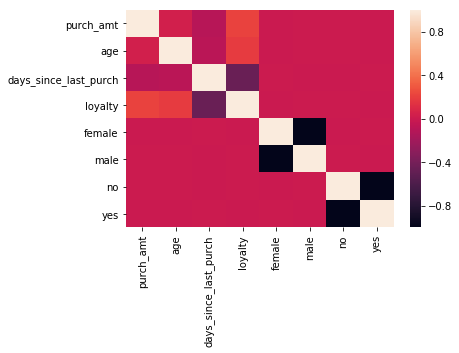

In [9]:
sns.heatmap(df.corr())

The strongest correlation to loyalty is days since last purchase.

Let's see how we can model loyalty.

### loyalty classifiers
Target variable is loyalty.  Test two options, one with all other data, and one that removes the gender and credit card features that showed no correlation.

In [10]:
target = df['loyalty']
data = df.drop(columns=['loyalty', 'gender', 'card_on_file'])
select_data = df.drop(columns=['loyalty', 'gender', 'card_on_file', 
    'male', 'female', 'yes', 'no'])

In [11]:
def model_test (model, X, Y):
    model.fit(X, Y)
    y_pred = model.predict(X)
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0], (target != y_pred).sum()))
    print("Accuracy Percentage: {}".format(
        '{0:.2%}'.format(((target == y_pred).sum()) / data.shape[0])))
    
    print("Confusion Matrix:", confusion_matrix(target, y_pred))
    

In [12]:
# test naive bayes
bnb = BernoulliNB()

model_test(bnb, data, target)

Number of mislabeled points out of a total 120000 points : 19993
Accuracy Percentage: 83.34%
Confusion Matrix: [[99993     7]
 [19986    14]]


In [13]:
# test naive bayes with feature selection
model_test(bnb, select_data, target)

Number of mislabeled points out of a total 120000 points : 19993
Accuracy Percentage: 83.34%
Confusion Matrix: [[99993     7]
 [19986    14]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# test default knn
knn = KNeighborsClassifier()

model_test(knn, data, target)

Number of mislabeled points out of a total 120000 points : 13181
Accuracy Percentage: 89.02%
Confusion Matrix: [[96112  3888]
 [ 9293 10707]]


In [15]:
# test default knn with feature selection
model_test(knn, select_data, target)

Number of mislabeled points out of a total 120000 points : 13242
Accuracy Percentage: 88.97%
Confusion Matrix: [[96026  3974]
 [ 9268 10732]]


In [16]:
# test knn weighted for distance
knn_d = KNeighborsClassifier(weights='distance')

model_test(knn_d, data, target)

Number of mislabeled points out of a total 120000 points : 19
Accuracy Percentage: 99.98%
Confusion Matrix: [[100000      0]
 [    19  19981]]


In [17]:
# test knn weighted for distance with feature selection
model_test(knn_d, select_data, target)

Number of mislabeled points out of a total 120000 points : 75
Accuracy Percentage: 99.94%
Confusion Matrix: [[100000      0]
 [    75  19925]]


All records incorrectly identified were false negatives.

In [18]:
# test default random forrest
rfc = ensemble.RandomForestClassifier()

model_test(rfc, data, target)

Number of mislabeled points out of a total 120000 points : 1939
Accuracy Percentage: 98.38%
Confusion Matrix: [[99851   149]
 [ 1790 18210]]


In [19]:
# test default random forest with feature selection
model_test(rfc, select_data, target)

Number of mislabeled points out of a total 120000 points : 2194
Accuracy Percentage: 98.17%
Confusion Matrix: [[99729   271]
 [ 1923 18077]]


In [20]:
criterion='gini'
# test random forrest with criterion on entropy
rfc_e = ensemble.RandomForestClassifier(criterion='entropy')

model_test(rfc_e, data, target)

Number of mislabeled points out of a total 120000 points : 1909
Accuracy Percentage: 98.41%
Confusion Matrix: [[99836   164]
 [ 1745 18255]]


In [21]:
# test random forrest with criterion on entropy with feature selection
model_test(rfc_e, select_data, target)

Number of mislabeled points out of a total 120000 points : 2120
Accuracy Percentage: 98.23%
Confusion Matrix: [[99778   222]
 [ 1898 18102]]


In [22]:
from sklearn.svm import LinearSVC
# test default support vector machine
svc = LinearSVC()

model_test(svc, data, target)

Number of mislabeled points out of a total 120000 points : 18476
Accuracy Percentage: 84.60%
Confusion Matrix: [[98957  1043]
 [17433  2567]]


In [23]:
# test default svc with feature selection
model_test(svc, select_data, target)

Number of mislabeled points out of a total 120000 points : 15932
Accuracy Percentage: 86.72%
Confusion Matrix: [[95988  4012]
 [11920  8080]]


In [24]:
# test support vector machine with balanced weight
svc_b = LinearSVC(class_weight='balanced')

model_test(svc_b, data, target)

Number of mislabeled points out of a total 120000 points : 17430
Accuracy Percentage: 85.47%
Confusion Matrix: [[96033  3967]
 [13463  6537]]


In [25]:
# test support vector machine with balanced weight and feature selection
model_test(svc_b, select_data, target)

Number of mislabeled points out of a total 120000 points : 17722
Accuracy Percentage: 85.23%
Confusion Matrix: [[99144   856]
 [16866  3134]]


The best results in identifying customers belonging to the loyalty program is with a distance-weighted knn model with 99.98% accuracy - only 19 loyalty members were incorrectly identified as non-members.